<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session4/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This code is an improvement over last network - 
* In last network, architecture was improved(increasing #kernels blocks) and #parameters(kernels) were optimized.
* Last code, best Vacc = 99.09
* In this code, added batch normalization and dropout iteratively.
* I have added batch norm first and then few iterations with different values of dropout. Logs for each of these iterations can be seen below.
* Though log is shown for different iterations, code is the final one which I will take to next code.
  
### Observations - 
* Batch norm can increase Vacc slightly, here it is increased from 99.09 to 99.21
* Although batch norm increases Vacc, we can still see some overfitting(difference between Test acc and Vacc is large - around 0.40)
* Batch norm is increasing #params slightly by 492
* Batch norm increases training time little, because of more computing and more #params to be trained.
* Now we have seen slight overfitting, that we can take as next step to overcome.
* For that, we can add dropout.
* Started with dropout = 0.25, which gives 99.22 Vacc. That means not an improvement over BN. But it is because 25% droping out is too much.
* Tried further with dropout value of 0.15, 0.10, 0.05. With 0.15 it is better than 0.25, but best result is with dropout = 0.10, that is Vacc = 99.38. Adding too much or too less dropout will reduce accuracy.
* Although best dropout percentage is needed, still we can see reduction in overfitting across iterations with different dropouts.
* train accuracy don't increase exponentially when using dropout, thus reducing overfitting

### Learnings and Conclusion - 
* Batch norm can increase Vacc, if the architecture is good.
* Adding dropout can reduce overfitting, but the dropout percentage needs to be optimal. Here 10% is giving best results.
* We are able to increase Vacc from 99.09 to 99.38 by adding BN and dropout.
* We can try other things like increasing #epochs, changing batch size, changing learning rate to increase out accuracy further.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


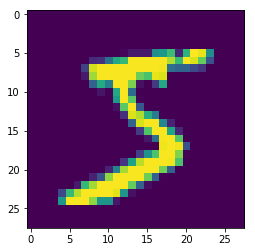

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()



model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))




Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning:

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 18)        72        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 23)        3749      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 23)        92        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 23)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 18)        432       
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 18)        72        
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
## Trying only batch norm
model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.1436 - acc: 0.9564 - val_loss: 0.0443 - val_acc: 0.9865
Epoch 2/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0450 - acc: 0.9858 - val_loss: 0.0468 - val_acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.0333 - acc: 0.9897 - val_loss: 0.0397 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.0283 - acc: 0.9908 - val_loss: 0.0381 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.0234 - acc: 0.9926 - val_loss: 0.0264 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.0201 - acc: 0.9933 - val_loss: 0.0363 - val_acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 31s 510us/

In [13]:
## Trying dropout of 0.25
model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 580us/step - loss: 0.2798 - acc: 0.9121 - val_loss: 0.0537 - val_acc: 0.9824
Epoch 2/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0940 - acc: 0.9707 - val_loss: 0.0353 - val_acc: 0.9887
Epoch 3/10
60000/60000 [==============================] - 33s 553us/step - loss: 0.0741 - acc: 0.9770 - val_loss: 0.0336 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0657 - acc: 0.9794 - val_loss: 0.0310 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 33s 553us/step - loss: 0.0610 - acc: 0.9806 - val_loss: 0.0270 - val_acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 33s 553us/step - loss: 0.0560 - acc: 0.9818 - val_loss: 0.0251 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 33s 552us/

In [13]:
## Trying dropout of 0.15
model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 592us/step - loss: 0.2295 - acc: 0.9288 - val_loss: 0.0473 - val_acc: 0.9843
Epoch 2/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.0722 - acc: 0.9779 - val_loss: 0.0434 - val_acc: 0.9863
Epoch 3/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.0586 - acc: 0.9818 - val_loss: 0.0355 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0505 - acc: 0.9839 - val_loss: 0.0311 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 33s 558us/step - loss: 0.0443 - acc: 0.9855 - val_loss: 0.0294 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 33s 558us/step - loss: 0.0408 - acc: 0.9868 - val_loss: 0.0285 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 33s 558us/

In [13]:
## Trying dropout of 0.10
model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 567us/step - loss: 0.2139 - acc: 0.9340 - val_loss: 0.0591 - val_acc: 0.9809
Epoch 2/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0660 - acc: 0.9794 - val_loss: 0.0385 - val_acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0526 - acc: 0.9832 - val_loss: 0.0322 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.0442 - acc: 0.9858 - val_loss: 0.0367 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0381 - acc: 0.9878 - val_loss: 0.0330 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0362 - acc: 0.9883 - val_loss: 0.0253 - val_acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 32s 532us/

In [13]:
## Trying dropout of 0.05
model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.1625 - acc: 0.9503 - val_loss: 0.0534 - val_acc: 0.9829
Epoch 2/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.0551 - acc: 0.9833 - val_loss: 0.0390 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.0422 - acc: 0.9862 - val_loss: 0.0322 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0356 - acc: 0.9886 - val_loss: 0.0296 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0293 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.0282 - acc: 0.9907 - val_loss: 0.0265 - val_acc: 0.9915
Epoch 7/10
60000/60000 [==============================] - 33s 556us/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.041294539852170055, 0.9888]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.03631275e-12 1.68673922e-10 4.54757521e-09 7.91817723e-10
  6.94930441e-13 2.50947842e-14 1.04101772e-16 1.00000000e+00
  1.16945928e-12 7.03261283e-10]
 [1.08879968e-10 1.64364593e-07 9.99999881e-01 5.88292219e-13
  1.36801690e-11 6.70446430e-17 2.76262568e-08 1.91677999e-14
  1.93287036e-11 3.68783094e-11]
 [1.53148875e-07 9.99993443e-01 5.17486114e-07 1.21324746e-07
  4.40114292e-07 3.57270800e-08 3.53600831e-06 1.74679053e-06
  6.09622361e-08 7.23317797e-08]
 [9.99992609e-01 1.13017243e-11 5.09248110e-09 4.88630143e-11
  2.97466857e-10 2.02038278e-12 7.36847323e-06 3.09360827e-14
  3.38181733e-10 7.07143935e-12]
 [6.39194914e-13 8.49370867e-13 3.01831802e-13 2.91313371e-12
  9.99992967e-01 8.09212246e-12 1.28290401e-09 3.26753243e-11
  7.65609590e-11 7.07966910e-06]
 [5.07178370e-08 9.99997497e-01 5.86518780e-08 5.33345812e-10
  5.66559436e-07 1.50948487e-09 8.49744737e-08 1.63576624e-06
  1.91263709e-07 2.77695715e-08]
 [4.57070498e-15 4.41082476e-10 4.45345193e-12 1.32606018e